In [ ]:
import nltk

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [ ]:
#looking for words package #wee need stop words package

In [ ]:
#Spam Email - Filter , we will be working on 

In [ ]:
#UCI has machine learning repository

In [ ]:
#Bunch of SMS spam collection Data set to build a filter from UCI

In [ ]:
#Reading data

In [1]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [2]:
len(messages)

5574

In [4]:
messages[50] #51st message

'ham\tWhat you thinked about me. First time you saw me in class.'

In [5]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
#\t separate message type(ham, spam) and actual message

In [8]:
import pandas as pd

In [9]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#data fetched in a cleaner way

In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
#separating ham and spam

In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
#feature engineeering needs to be done to get better insights

In [16]:
messages['length']= messages['message'].apply(len)

In [17]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
#Visualizing message length

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib inline

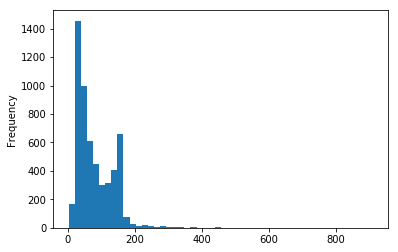

In [21]:
messages['length'].plot.hist(bins=50)

In [23]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [27]:
#histogram of messages

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07EEA0D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x07F031D0>], dtype=object)

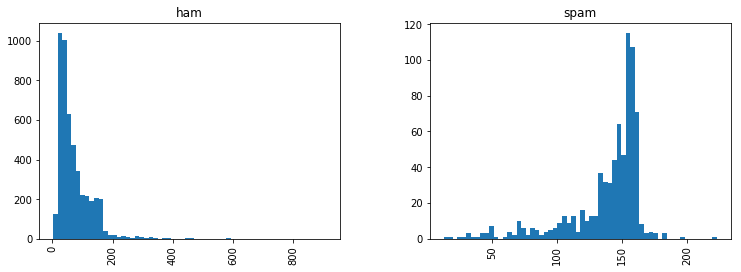

In [29]:
messages.hist(column='length', by= 'label', bins=60, figsize=(12,4))

In [30]:
#length is good way to distinguish between ham and spam 

In [31]:
#text preprocessing, all data is in string data and we need numerical data to do classification

In [32]:
#change it to vectors

In [33]:
#splitting message into individual words

In [34]:
import string

In [35]:
#remove punctuation

In [36]:
mess ="wow! what. a nice: message"

In [37]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#remove punctuation 

In [39]:
nopunc= [c for c in mess if c not in string.punctuation]

In [41]:
nopunc

['w',
 'o',
 'w',
 ' ',
 'w',
 'h',
 'a',
 't',
 ' ',
 'a',
 ' ',
 'n',
 'i',
 'c',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e']

In [42]:
#removing stop words

In [43]:
from nltk.corpus import stopwords

In [44]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
#common english stop words, can be used dictionary, cant be used for distinguishing

In [46]:
nopunc = ''.join(nopunc) #joining elements in a list together to from string

In [47]:
nopunc

'wow what a nice message'

In [48]:
nopunc.split()

['wow', 'what', 'a', 'nice', 'message']

In [49]:
#removing stop words

In [50]:
clean_mess =[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [51]:
clean_mess

['wow', 'nice', 'message']

In [52]:
#create function to perform both the things

In [53]:
def text_processing(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean words
    """
    nopunc =[char for char in mess if char not in string.punctuation]
    
    nopunc= ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower not in stopwords.words('english')]

In [54]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
messages['message'].head(5).apply(text_processing)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [57]:
#normalized the data

In [58]:
#stemming can also be done, if text has similar words like - running, ran, run - break all of these down and returns 1

In [59]:
#stemming wont be gtood on text data where we use slangs more

In [60]:
#convert each message into vector which machine learning models can understand

In [61]:
#vectorization

In [62]:
#1. count how many times a word occurs in a message tf

In [63]:
#2 weigh the counts so that frequent tokens get lower weights idf

In [64]:
#3 L2 normal form - normalize vectors to unit length to abstract from original text length

In [66]:
#using scikit learn countVectorizer 

In [67]:
#each column here will represent the message no and rows the word 1, word 2 etc count, 2-d matrix

In [69]:
#print a sparse matrix -as there will be so many zero values to save memory

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
bow_transformer = CountVectorizer(analyzer=text_processing).fit(messages['message'])

In [74]:
print(len(bow_transformer.vocabulary_))

11747


In [75]:
mess4 = messages['message'][3]

In [76]:
print(mess4)

U dun say so early hor... U c already then say...


In [77]:
bow4=bow_transformer.transform([mess4])

In [79]:
print(bow4)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [80]:
#to check the words at the above mentioned indexes
bow_transformer.get_feature_names()[4221]

'U'

In [81]:
bow_transformer.get_feature_names()[9832]

'say'

In [82]:
messages_bow= bow_transformer.transform(messages['message'])

In [83]:
print('Shape of Sparse Matrix', messages_bow.shape)

Shape of Sparse Matrix (5572, 11747)


In [84]:
messages_bow.nnz #non zero occurences

79463

In [86]:
sparsity= (100.0* messages_bow.nnz/(messages_bow.shape[0]* messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.12140229049026034


In [87]:
#comparison non zeros messages compared to zero messages

In [88]:
#tf and idf

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

In [91]:
tfidf_transformer= TfidfTransformer().fit(messages_bow)

In [92]:
tfidf4 = tfidf_transformer.transform(bow4)

In [94]:
print(tfidf4)

  (0, 10703)	0.221482852564
  (0, 10174)	0.193450513267
  (0, 9832)	0.514749313079
  (0, 7427)	0.419528360236
  (0, 6447)	0.304628956074
  (0, 6427)	0.28629349827
  (0, 5476)	0.284154050159
  (0, 4828)	0.254427694692
  (0, 4221)	0.390271188407


In [95]:
#these are weight values for each of these terms as compared to document

In [96]:
#university tf-idf check

In [97]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [98]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [99]:
#naive bayes classfier used now

In [100]:
from sklearn.naive_bayes import MultinomialNB

In [101]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [102]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [103]:
messages['label'][3]

'ham'

In [104]:
#prediction matches with actual label

In [105]:
#to detect same for all messages

In [106]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [107]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'],
      dtype='<U4')

In [108]:
#we didnt separate train and test, we will do it now

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
msg_train, msg_test, label_train, label_test= train_test_split(messages['message'], messages['label'], test_size=0.3)

In [111]:
msg_train

4017              In which place i can get rooms cheap:-)
5541                                Yeah it's jus rite...
4421                      Ok i msg u b4 i leave my house.
120     PRIVATE! Your 2004 Account Statement for 07742...
3519                Are you willing to go for apps class.
2929                                          Anything...
3660              Wait.i will come out.. &lt;#&gt;  min:)
5341               And of course you should make a stink!
5136    There are some nice pubs near here or there is...
3142                       Customer place i will call you
888     Y dun cut too short leh. U dun like ah? She fa...
2426    Hey!!! I almost forgot ... Happy B-day babe ! ...
813     Congratulations ur awarded either £500 of CD g...
4868              Okey dokey swashbuckling stuff what oh.
5326                           What makes you most happy?
13      I've been searching for the right words to tha...
4988    No rushing. I'm not working. I'm in school so ...
4229          

In [112]:
#it can be done in the same way as done before and repeat same process

In [113]:
#but we can use data pipeline also from sklearn and do it in more faster way

In [114]:
from sklearn.pipeline import Pipeline

In [116]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)), #tuple - name of step and function
    #dtring to token step
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
]) 

In [117]:
#its an estimator

In [118]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x1267A810>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=Non...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [119]:
predictions= pipeline.predict(msg_test)

In [120]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.94      1.00      0.97      1449
       spam       1.00      0.58      0.74       223

avg / total       0.95      0.94      0.94      1672



In [122]:
# Precision is 94% almost

In [123]:
#we can replace MultinomialNB by random Forest by just changing the pipeline